In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from  keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt

In [4]:
IMG_HEIGHT = 48
IMG_WIDTH = 48
batch_size = 32

In [5]:

train_data_dir = r"C:\Users\ashis\OneDrive\Desktop\Emotion detection\archive\train"
validation_data_dir = r"C:\Users\ashis\OneDrive\Desktop\Emotion detection\archive\test" 

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
color_mode='grayscale',target_size=(IMG_HEIGHT,IMG_WIDTH),batch_size=batch_size,class_mode='categorical',shuffle=True)

validation_generator = validation_datagen.flow_from_directory(train_data_dir,
color_mode='grayscale',target_size=(IMG_HEIGHT,IMG_WIDTH),batch_size=batch_size,class_mode='categorical',shuffle=True)

Found 28709 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.


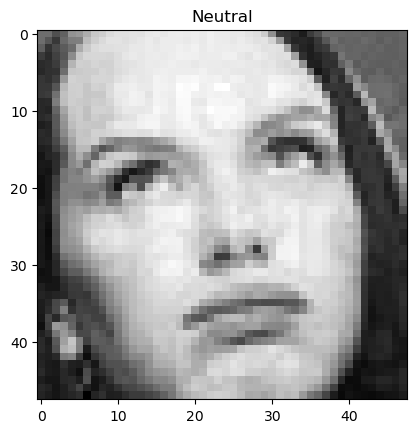

In [7]:
## verify our generator by plotting a few faces and printing corresponding labels
class_labels = ['Angry','Disgust','Fear','Happy','Neutral','sad','Surprise']

img, label = train_generator.__next__()

import random

i=random.randint(0,(img.shape[0])-1)
image=img[i]
labl=class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [8]:
## now we create the cnn model
model = Sequential()

In [9]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                 

In [10]:
train_path = r"C:\Users\ashis\OneDrive\Desktop\Emotion detection\archive\train"
test_path = r"C:\Users\ashis\OneDrive\Desktop\Emotion detection\archive\test"

In [11]:
num_train_imgs = 0
for root, dirs,files in os.walk(train_path):
    num_train_imgs +=len(files)
num_test_imgs = 0
for root, dirs,files in os.walk(test_path):
    num_test_imgs +=len(files)
    
epochs=50   

In [12]:
history=model.fit(train_generator,steps_per_epoch=num_train_imgs//batch_size,epochs=epochs,
                 validation_data=validation_generator,validation_steps=num_test_imgs//batch_size)

model.save('emotion_detection_model_100epochs.hS')

Epoch 1/50


897/897 [==============================] - 100s 109ms/step - loss: 1.6694 - accuracy: 0.3302 - val_loss: 1.4494 - val_accuracy: 0.4424
Epoch 2/50
897/897 [==============================] - 101s 113ms/step - loss: 1.3730 - accuracy: 0.4716 - val_loss: 1.2097 - val_accuracy: 0.5470
Epoch 3/50
897/897 [==============================] - 103s 115ms/step - loss: 1.2235 - accuracy: 0.5346 - val_loss: 1.0884 - val_accuracy: 0.5875
Epoch 4/50
897/897 [==============================] - 105s 117ms/step - loss: 1.1344 - accuracy: 0.5677 - val_loss: 1.0137 - val_accuracy: 0.6144
Epoch 5/50
897/897 [==============================] - 104s 116ms/step - loss: 1.0668 - accuracy: 0.5993 - val_loss: 0.9204 - val_accuracy: 0.6528
Epoch 6/50
897/897 [==============================] - 104s 116ms/step - loss: 1.0001 - accuracy: 0.6219 - val_loss: 0.8302 - val_accuracy: 0.7008
Epoch 7/50
897/897 [==============================] - 104s 116ms/step - loss: 0.9225 - accuracy: 0.6530 - val_loss: 0.7371

INFO:tensorflow:Assets written to: emotion_detection_model_100epochs.hS\assets


<function matplotlib.pyplot.show(close=None, block=None)>

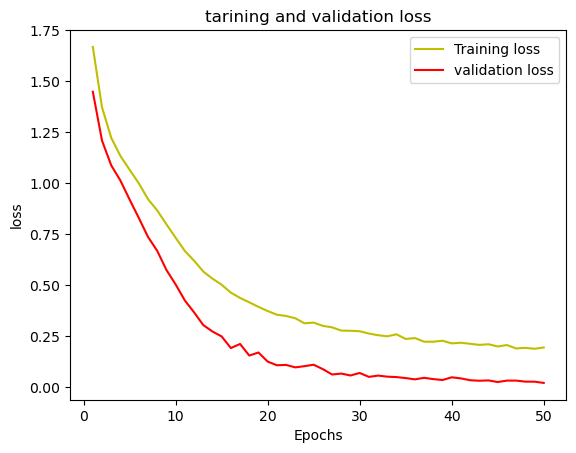

In [13]:
## plot training and validation accuracy and loss at each epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y', label = 'Training loss')
plt.plot(epochs,val_loss,'r', label= 'validation loss')
plt.title('tarining and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show


In [14]:
from keras.models import load_model

In [15]:
## test the model 
my_model  = load_model('emotion_detection_model_100epochs.hS', compile=False)

In [19]:
## generate a batch of images
test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print("Accuracy=",metrics.accuracy_score(test_labels,predictions))

1/1 [==============================] - 0s 122ms/step
Accuracy= 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

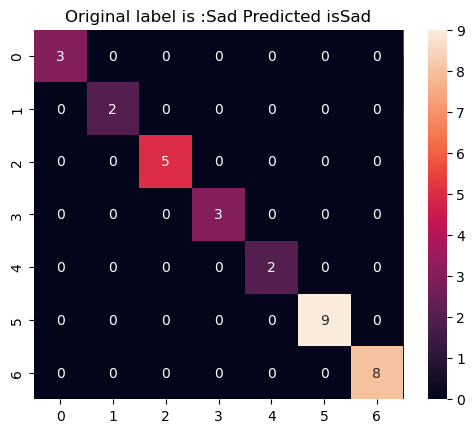

In [33]:
## confusion matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predictions)

## print(cm)

import seaborn as sns
sns.heatmap(cm, annot = True)

class_labels=['Angry','Disgust', 'Fear','Happy',"Neatral",'Sad','Surprise']

## check result in few select images

n = random.randint(0,test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is :"+orig_labl+" Predicted is"+ pred_labl)
plt.show

